In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


classes = pd.read_csv("data/bio-pathways-diseaseclasses.csv")
name_to_class = {row["Disease Name"]: row["Disease Class"] for _, row in classes.iterrows()}
classes = set(name_to_class.values())
classes_to_n = {class_: i for i, class_ in enumerate(classes)}
features = pd.read_csv("data/bio-pathways-features.csv").dropna()
motifs = pd.read_csv("data/bio-pathways-diseasemotifs.csv").dropna()


In [22]:
len(classes)

30

In [23]:
y = features.loc[:, "Disease Name"].apply(lambda x: name_to_class.get(x)).dropna()
y = y.apply(lambda x: classes_to_n[x])
X = features.loc[y.index,:].iloc[:,2:]
X.shape, y.shape

((297, 5), (297,))

Text(0.5, 1.0, 'PCA')

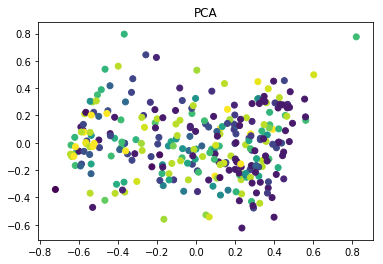

In [24]:
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)
plt.scatter(Xp[:,0], Xp[:, 1], c=y)
plt.title("PCA")

Text(0.5, 1.0, 'TSNE')

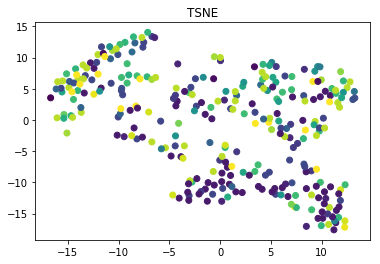

In [25]:
tsne = TSNE(n_components=2)
Xpp = tsne.fit_transform(X)
plt.scatter(Xpp[:,0], Xpp[:, 1], c=y)
plt.title("TSNE")

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=25)

# accuracy using features
svc = SVC(kernel="linear")
lr = LogisticRegression(max_iter=1000)
svc.fit(X_train, y_train)
lr.fit(X_train, y_train)

svc.score(X_test, y_test), lr.score(X_test, y_test)

(0.25333333333333335, 0.26666666666666666)

In [27]:
y = motifs.loc[:, "Disease Name"].apply(lambda x: name_to_class.get(x)).dropna()
y = y.apply(lambda x: classes_to_n[x])
X = motifs.loc[y.index,:].iloc[:,2:]
X.shape, y.shape

((300, 73), (300,))

Text(0.5, 1.0, 'PCA')

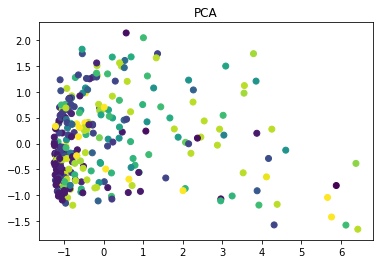

In [28]:
Xp = pca.fit_transform(X)
plt.scatter(Xp[:,0], Xp[:,1], c=y)
plt.title("PCA")

Text(0.5, 1.0, 'TSNE')

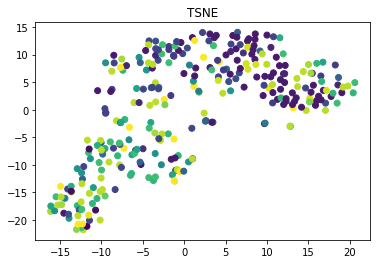

In [29]:
Xpp = tsne.fit_transform(X)
plt.scatter(Xpp[:,0], Xpp[:, 1], c=y)
plt.title("TSNE")

In [32]:
# accuracy using features
svc = SVC(kernel="linear")
lr = LogisticRegression(max_iter=1000)
svc.fit(X, y)
lr.fit(X, y)

svc.score(X, y), lr.score(X, y)

(0.47333333333333333, 0.45)